## Import all libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

## Import ML libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5]:
bikedata = pd.read_csv("day.csv")

In [6]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
seasons = pd.get_dummies(bikedata['season'])

In [10]:
seasons.head()

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [11]:
seasons.rename(columns={1:'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)

In [12]:
seasons.drop(['spring'], axis = 1, inplace = True)

In [13]:
bikedata = pd.concat([bikedata, seasons], axis = 1)

In [14]:
weather = pd.get_dummies(bikedata['weathersit'])

In [15]:
weather.head()

,1,2,3
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False


In [16]:
weather.rename(columns={1:'clear',2:'mist',3:'light rain'}, inplace=True)

In [17]:
weather.drop(['clear'], axis = 1, inplace = True)

In [18]:
bikedata = pd.concat([bikedata, weather], axis = 1)

In [19]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,summer,fall,winter,mist,light rain
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,False,False,False,True,False
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,False,False,False,True,False
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,False,False,False,False,False
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,False,False,False,False,False
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,False,False,False,False,False


In [20]:
#Dropping instant as this is basically index
bikedata.drop(['instant'], axis = 1, inplace = True)

In [21]:
#season and weatherist had to be dropeed as keeping these will cause R2 and Adjusted R2 to be 1 which will overfit the model
bikedata.drop(['season'], axis = 1, inplace = True)
bikedata.drop(['weathersit'], axis = 1, inplace = True)

In [22]:
varlist =  ['summer', 'fall', 'winter', 'mist', 'light rain']

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
bikedata[varlist] = bikedata[varlist].apply(binary_map)

In [23]:
bikedata.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,mist,light rain
0,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [24]:
#Converting dteday to ddmmyy to extract month, date of week and to check if the extracted date is a weekend
bikedata['dteday'] = pd.to_datetime(bikedata['dteday'], format="%d-%m-%Y")

In [25]:
# Create time features
bikedata['month'] = bikedata['dteday'].dt.month
bikedata['dow'] = bikedata['dteday'].dt.dayofweek
bikedata['is_weekend'] = (bikedata['dteday'].dt.dayofweek >= 5).astype(int)

In [26]:
#Dropping date and month as required info are extracted from date
#dropping weekday as weeday and dow are basically the same
bikedata.drop(['dteday'], axis = 1, inplace = True)
bikedata.drop(['mnth'], axis = 1, inplace = True)
bikedata.drop(['weekday'], axis = 1, inplace = True)

In [27]:
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,mist,light rain,month,dow,is_weekend
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,1,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,2,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,1,3,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,1,4,0


In [28]:
#Casual and registered are dropped from the dataset as they are dependent variables to cnt. Keeping this will cause VIF to be infinite

bikedata.drop(['casual'], axis = 1, inplace = True)
bikedata.drop(['registered'], axis = 1, inplace = True)

In [29]:
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,mist,light rain,month,dow,is_weekend
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,1,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1,2,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,1,3,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,4,0


In [30]:
#bikedata['cnt'] = np.sqrt(bikedata['cnt'])

## Apply scaling

In [31]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikedata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt', 'month', 'dow']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,mist,light rain,month,dow,is_weekend
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0.818182,0.333333,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0.545455,0.333333,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0,0.181818,1.000000,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,1.000000,0.000000,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0.272727,1.000000,1


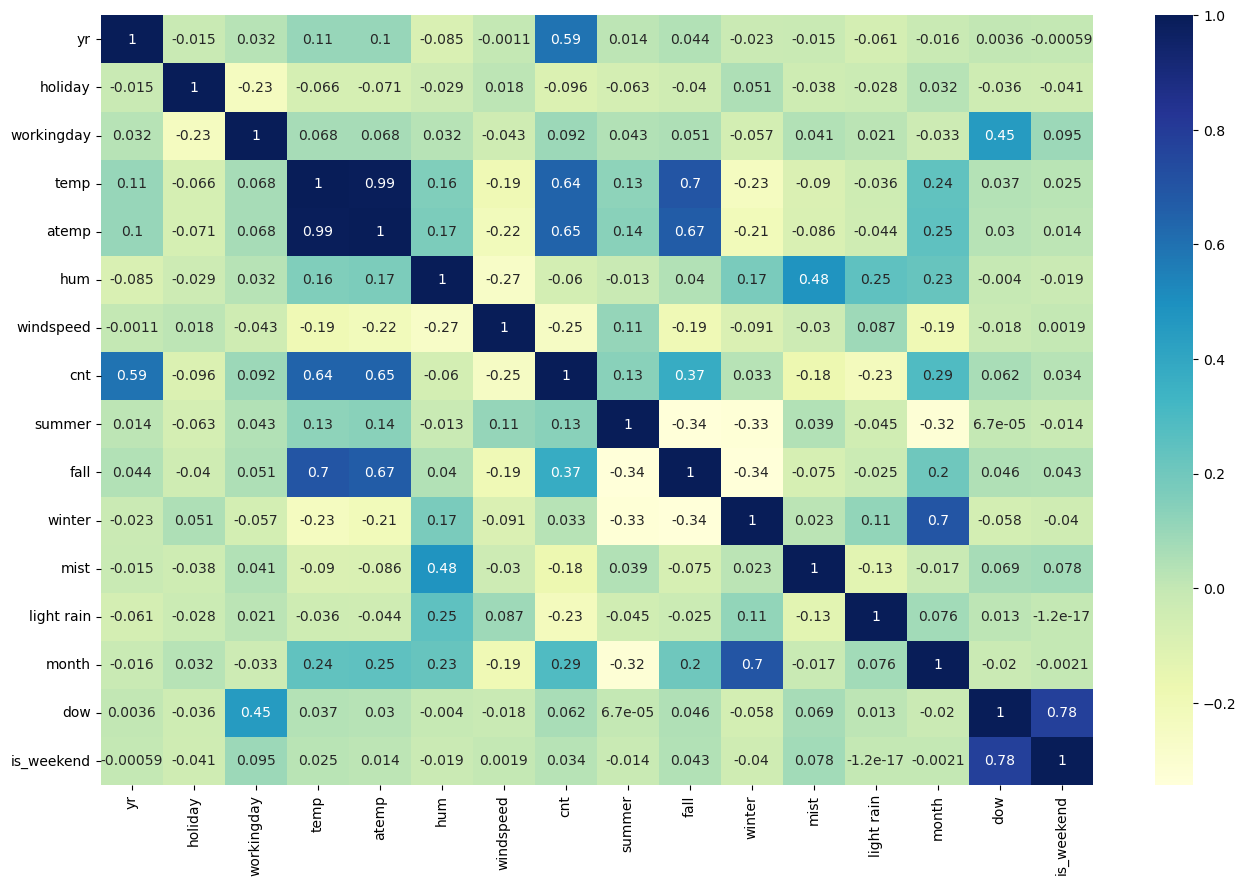

In [35]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

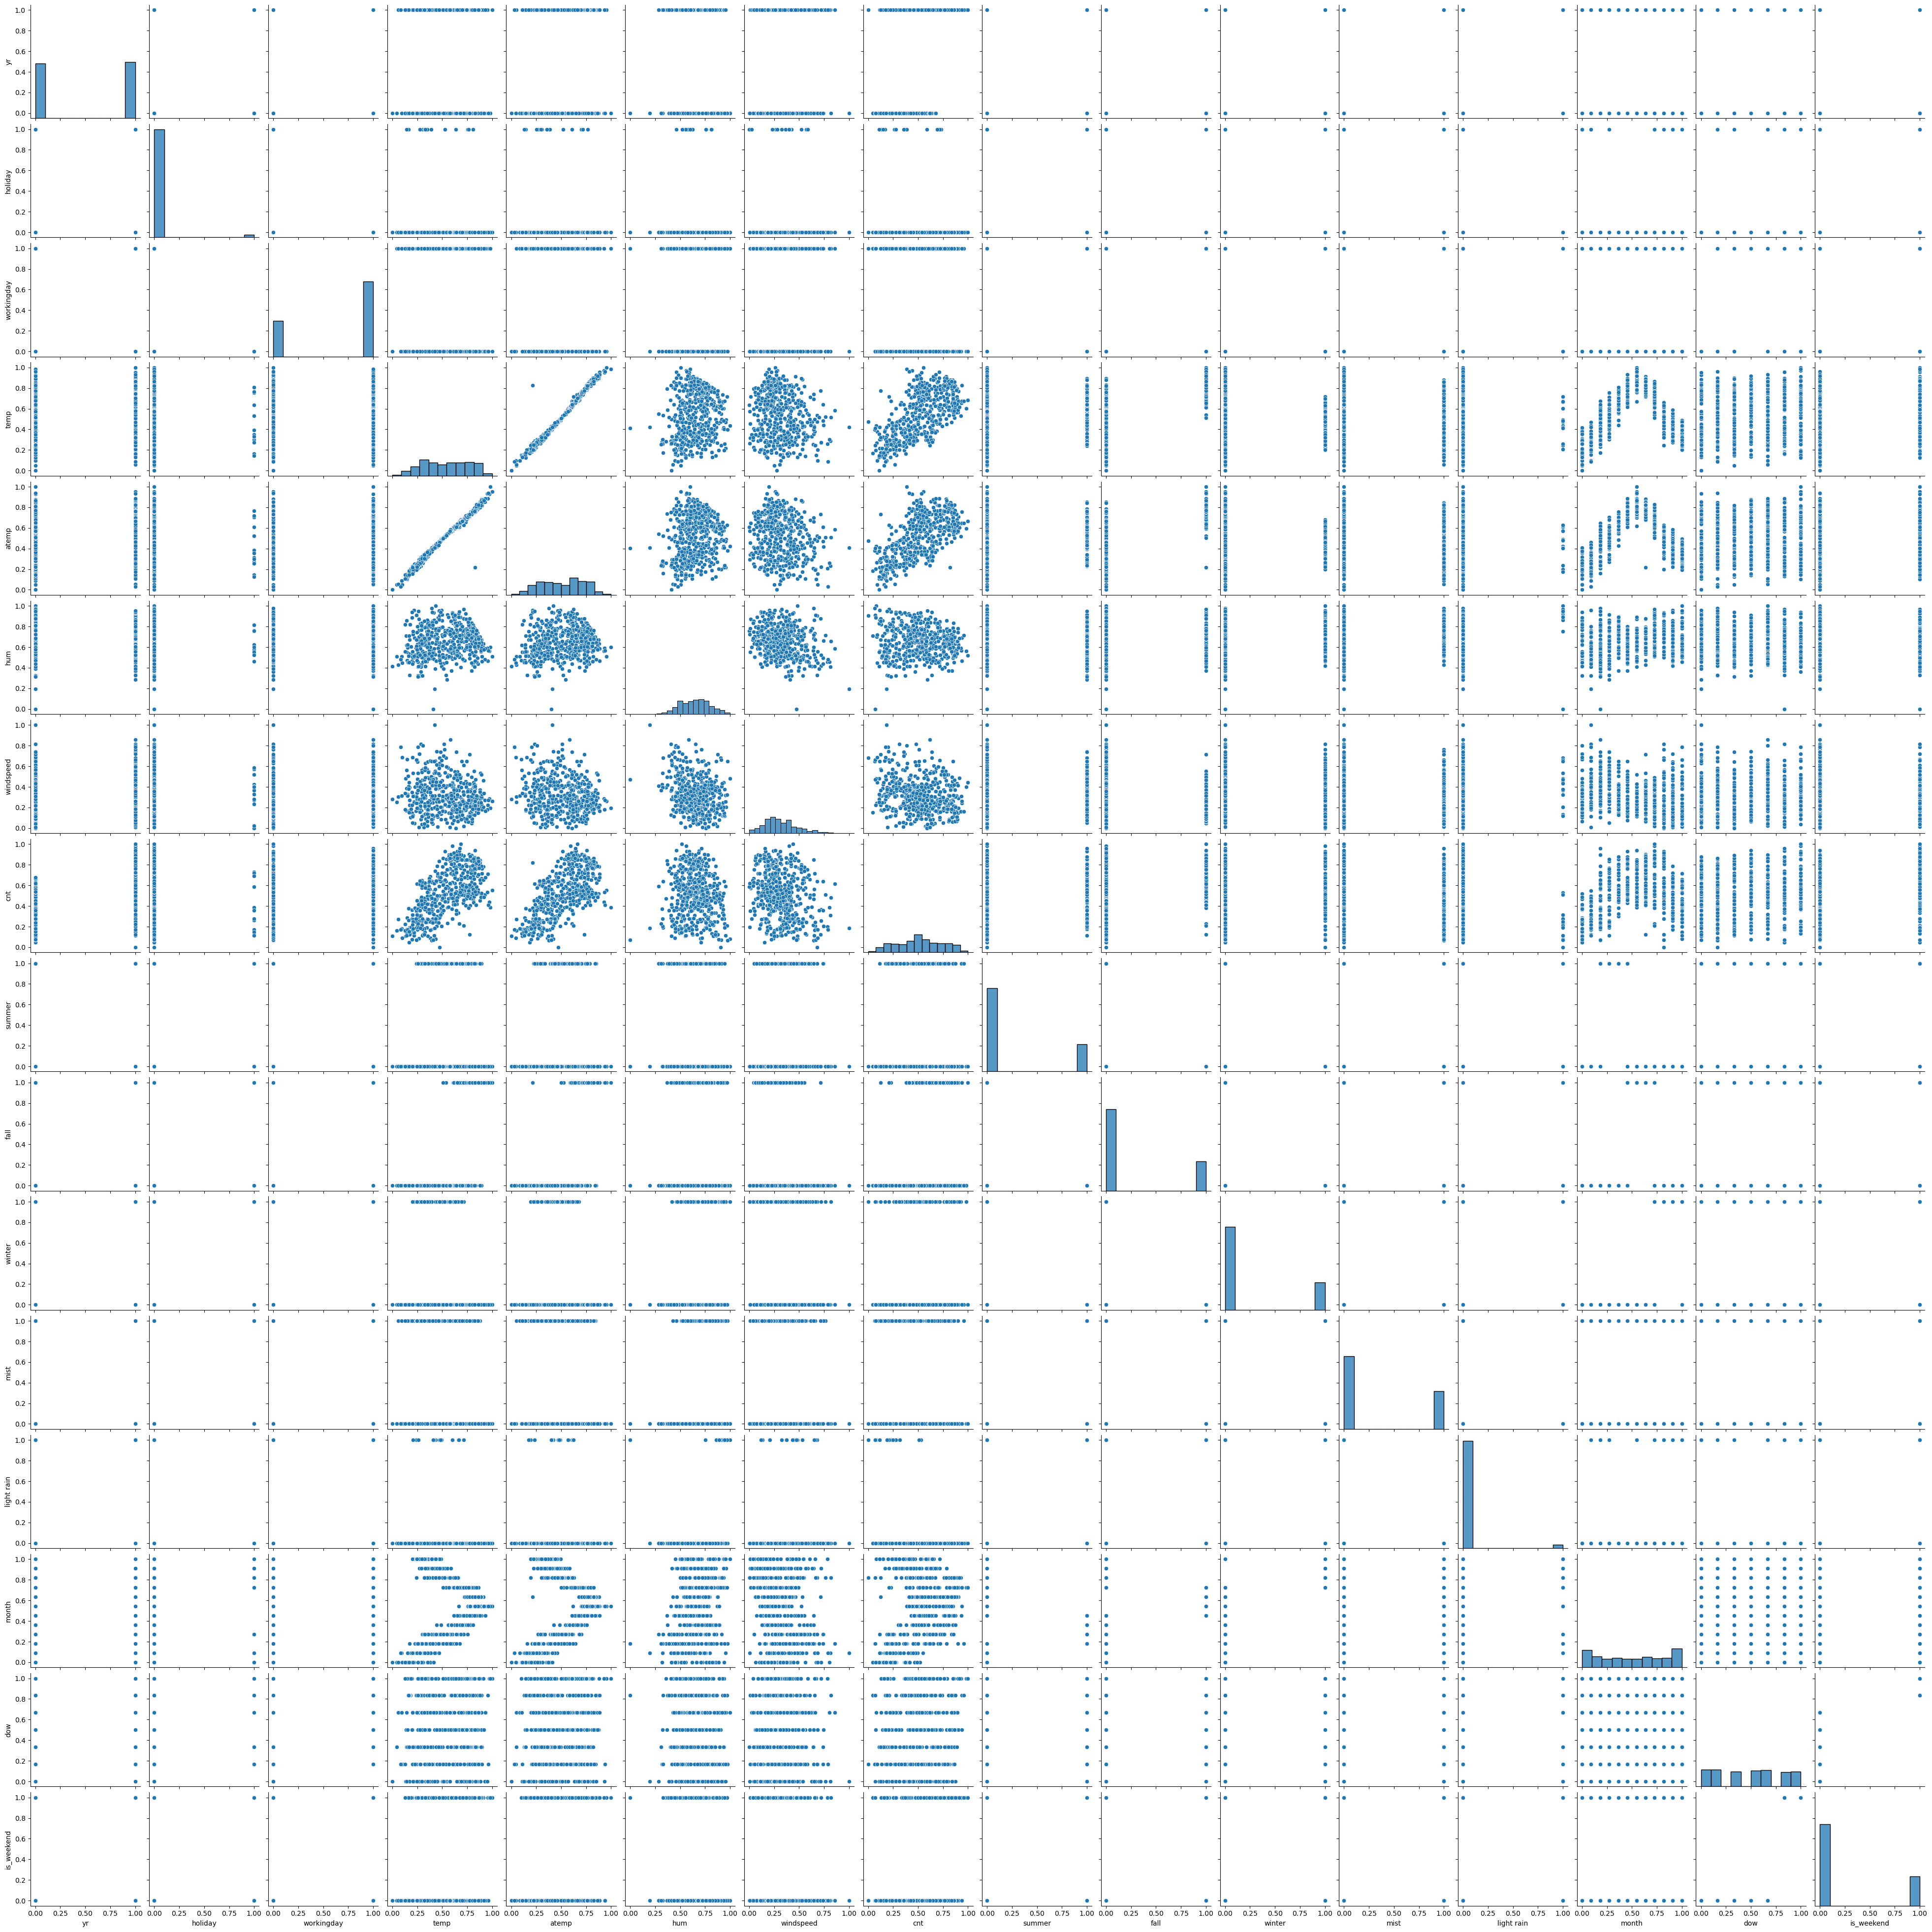

In [36]:
sns.pairplot(df_train)
plt.show()

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(6)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(2)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('fall', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1)),
 ('mist', np.True_, np.int64(1)),
 ('light rain', np.True_, np.int64(1)),
 ('month', np.False_, np.int64(4)),
 ('dow', np.False_, np.int64(3)),
 ('is_weekend', np.False_, np.int64(5))]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'mist', 'light rain'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month', 'dow', 'is_weekend'], dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          4.78e-183
Time:                        14:07:17   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2178      0.028      7.788      0.0

Rentals increase with temperature, and in summer/fall/winter compared to spring.

Rentals drop on holidays, during humid/windy or rainy days.

Year-over-year growth is strong (yr variable).

In [47]:
# Calculate the VIFs as all columns are significant
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.87
7,fall,4.78
3,temp,3.50
6,summer,2.54
4,hum,1.87
8,winter,1.87
9,mist,1.56
10,light rain,1.24
5,windspeed,1.19
1,yr,1.03


In [48]:
y_train_price = lm.predict(X_train_rfe)

/var/folders/s7/5gbp5bks51b0zxqvq4__sf940000gn/T/ipykernel_83729/3757811417.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


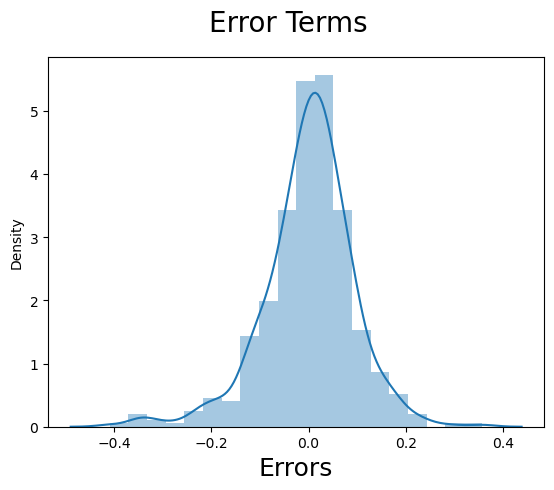

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         
plt.show()   

### The above chart validates the residual analysis where errors are normally distributed

In [50]:
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)

## Apply scaling on Test

In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt', 'month', 'dow']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [54]:
# Making predictions
y_pred = lm.predict(X_test_new)

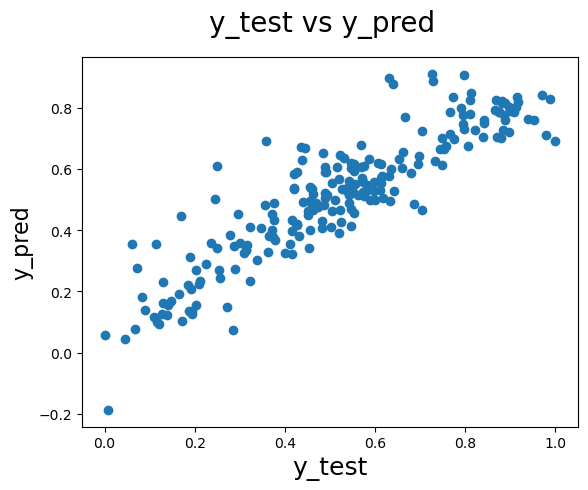

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## R2 Score

In [56]:
r2_score(y_test, y_pred)

0.8022129131383284

## Relative Impact of Features on Shared Bike Demand

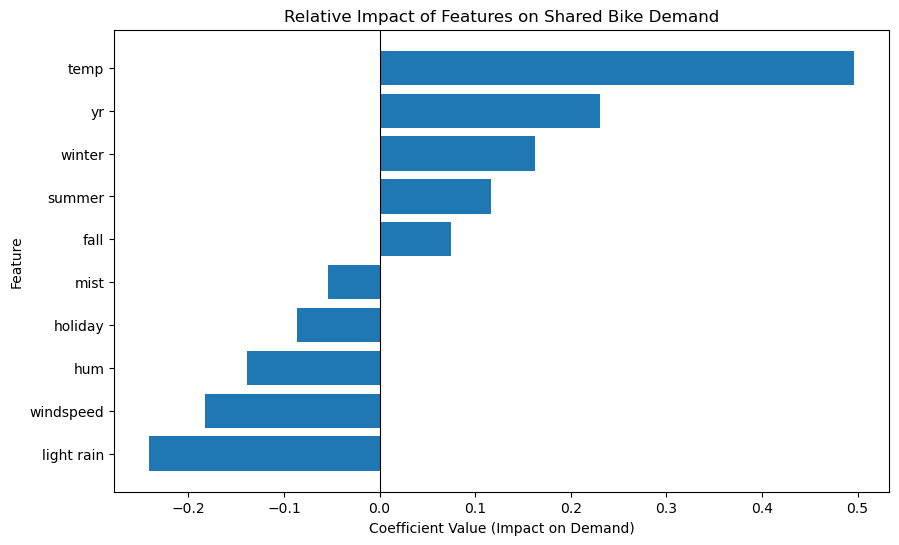

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe from the regression coefficients
data = {
    "Feature": ["yr", "holiday", "temp", "hum", "windspeed", "summer", "fall", "winter", "mist", "light rain"],
    "Coefficient": [0.2307, -0.0865, 0.4961, -0.1390, -0.1827, 0.1168, 0.0746, 0.1630, -0.0537, -0.2409]
}
df = pd.DataFrame(data)

# Sort features by coefficient magnitude
df["AbsCoef"] = df["Coefficient"].abs()
df_sorted = df.sort_values("Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Feature"], df_sorted["Coefficient"])
plt.xlabel("Coefficient Value (Impact on Demand)")
plt.ylabel("Feature")
plt.title("Relative Impact of Features on Shared Bike Demand")
plt.axvline(0, color="black", linewidth=0.8)
plt.gca().invert_yaxis()
plt.show()


## Effect of Categorical Variables on Shared Bike Demand

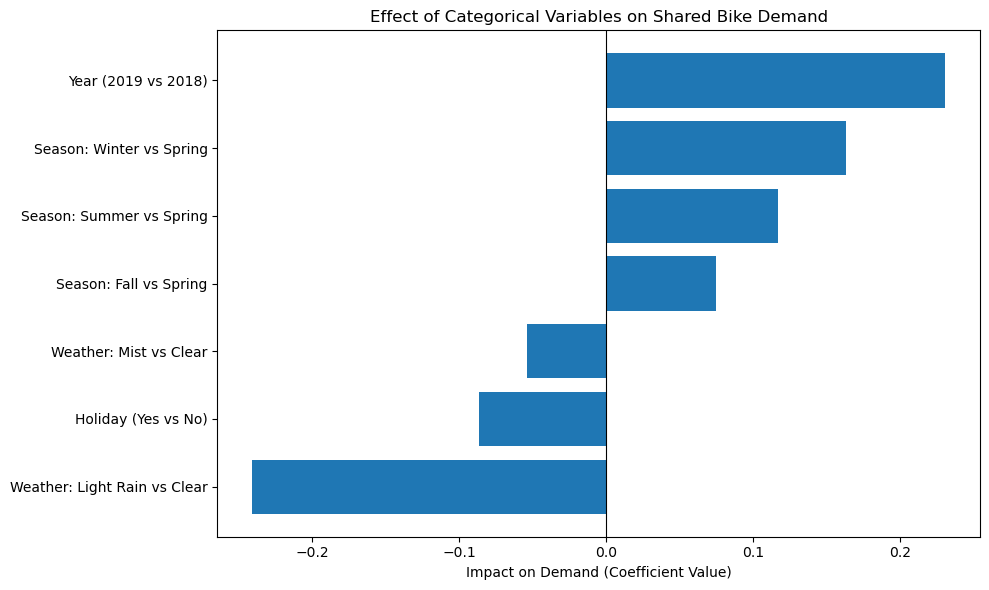

In [58]:
# Create a summary DataFrame for categorical effects
cat_effects = pd.DataFrame({
    "Category": [
        "Year (2019 vs 2018)", 
        "Holiday (Yes vs No)", 
        "Season: Summer vs Spring", 
        "Season: Fall vs Spring", 
        "Season: Winter vs Spring", 
        "Weather: Mist vs Clear", 
        "Weather: Light Rain vs Clear"
    ],
    "Effect on Demand": [0.2307, -0.0865, 0.1168, 0.0746, 0.1630, -0.0537, -0.2409]
})

# Sort for better visualization
cat_effects = cat_effects.sort_values("Effect on Demand", ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(cat_effects["Category"], cat_effects["Effect on Demand"])
plt.xlabel("Impact on Demand (Coefficient Value)")
plt.title("Effect of Categorical Variables on Shared Bike Demand")
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()


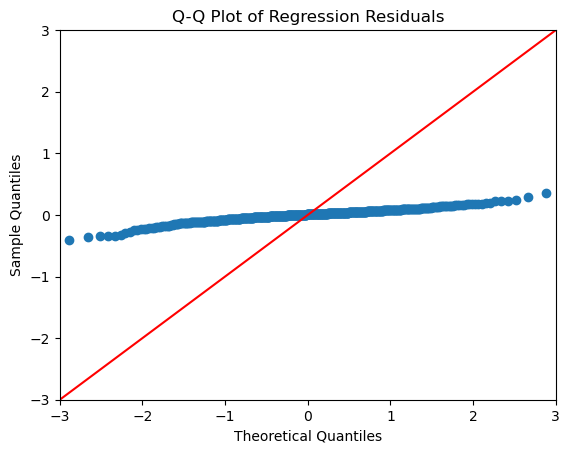

In [59]:
# Extract residuals to plot a Q-Q Graph
residuals = lm.resid

# Q-Q Plot
fig = sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### The above chart shows that eventhough R2 value is good, Q-Q output doesn't provide a satisfactory output